<a href="https://colab.research.google.com/github/Topeifeoluwa-2008/Heart_Disease_Predictor/blob/main/Disease_prediction_5days_Bootcamp_by_Devtown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DAY 01 - DATA PREPARATION**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oluwolehannah","key":"8e798bd1f13cec0c968d8c2f97612a28"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease  --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 48.8MB/s]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [7]:
df.rename(columns={
    "cp": "chest_pain_type",
    "trestbps": "resting_blood_pressure",
    "chol": "serum_cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "resting_ecg_results",
    "thalch": "max_heart_rate",
    "exang": "exercise_induced_angina",
    "oldpeak": "depression_induced_by_exercise",
    "ca" : "number_of_major_vessels",
    "thal" : "thalassemia",
    "num": "heart_disease"}, inplace=True)

In [8]:
df

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,depression_induced_by_exercise,slope,number_of_major_vessels,thalassemia,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
df.head()

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,depression_induced_by_exercise,slope,number_of_major_vessels,thalassemia,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
df.tail()

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,depression_induced_by_exercise,slope,number_of_major_vessels,thalassemia,heart_disease
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              920 non-null    int64  
 1   age                             920 non-null    int64  
 2   sex                             920 non-null    object 
 3   dataset                         920 non-null    object 
 4   chest_pain_type                 920 non-null    object 
 5   resting_blood_pressure          861 non-null    float64
 6   serum_cholesterol               890 non-null    float64
 7   fasting_blood_sugar             830 non-null    object 
 8   resting_ecg_results             918 non-null    object 
 9   max_heart_rate                  865 non-null    float64
 10  exercise_induced_angina         865 non-null    object 
 11  depression_induced_by_exercise  858 non-null    float64
 12  slope                           611 

In [12]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'chest_pain_type',
       'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar',
       'resting_ecg_results', 'max_heart_rate', 'exercise_induced_angina',
       'depression_induced_by_exercise', 'slope', 'number_of_major_vessels',
       'thalassemia', 'heart_disease'],
      dtype='object')


In [13]:
df.describe()

,id,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,depression_induced_by_exercise,number_of_major_vessels,heart_disease
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [14]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
chest_pain_type,0
resting_blood_pressure,59
serum_cholesterol,30
fasting_blood_sugar,90
resting_ecg_results,2
max_heart_rate,55


In [15]:
numeric_cols= df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

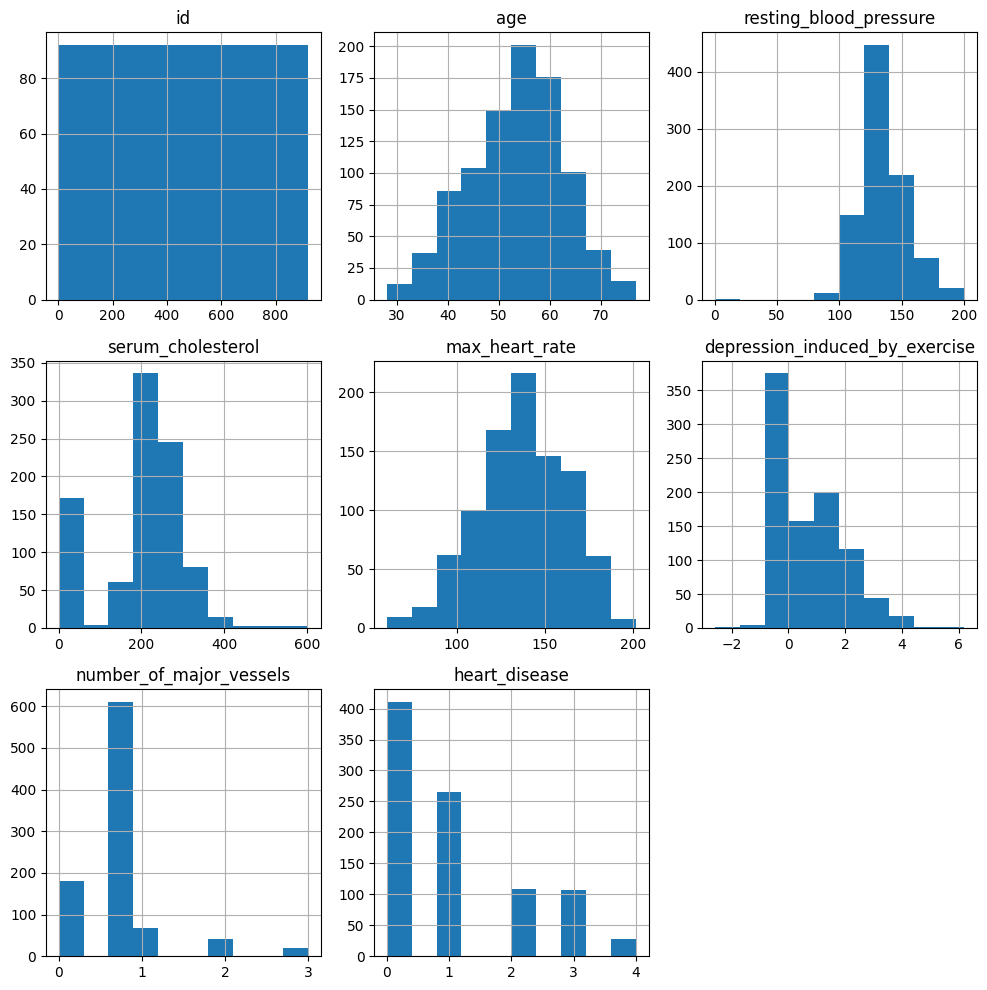

In [16]:
df[numeric_cols].hist(figsize=(10,10))
plt.tight_layout()
plt.show()

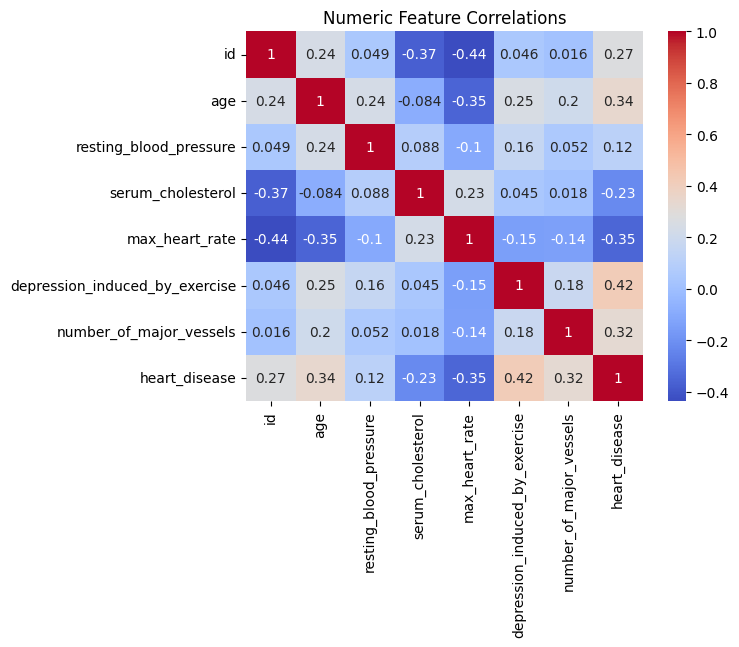

In [17]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

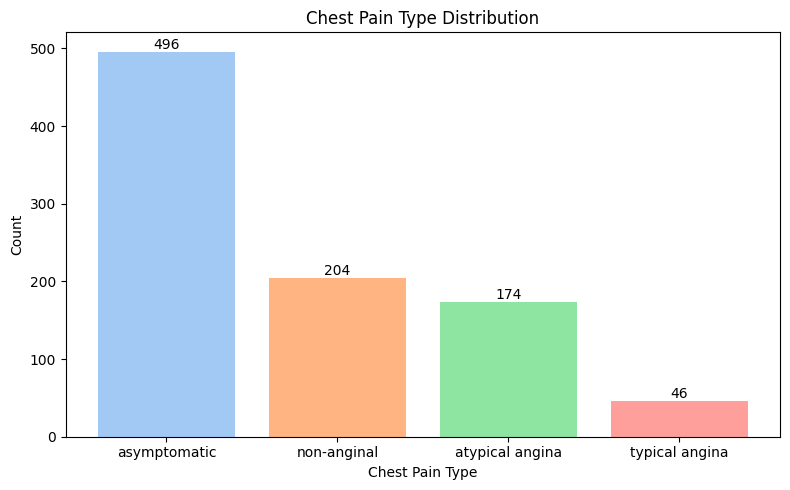

In [18]:
# Bar chart for chest pain type distribution
chest_pain_counts = df['chest_pain_type'].value_counts()
plt.figure(figsize=(8, 5))
bars = plt.bar(chest_pain_counts.index, chest_pain_counts.values, color=sns.color_palette("pastel"))
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.tight_layout()

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

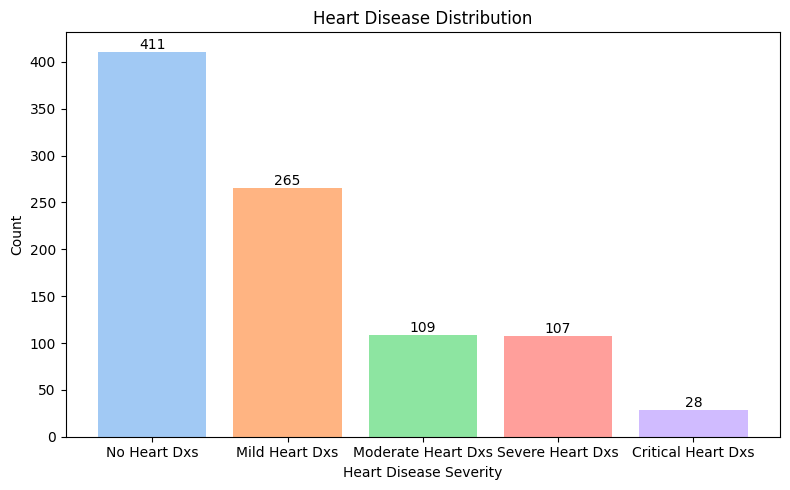

In [19]:
# Counts of 'heart_disease' in the dataset
heart_disease_counts = df['heart_disease'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
labels = ['No Heart Dxs', 'Mild Heart Dxs', 'Moderate Heart Dxs', 'Severe Heart Dxs', 'Critical Heart Dxs']
bars = plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=sns.color_palette("pastel"))
plt.title('Heart Disease Distribution')
plt.xticks(heart_disease_counts.index, labels)
plt.xlabel('Heart Disease Severity')
plt.ylabel('Count')
plt.tight_layout()
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

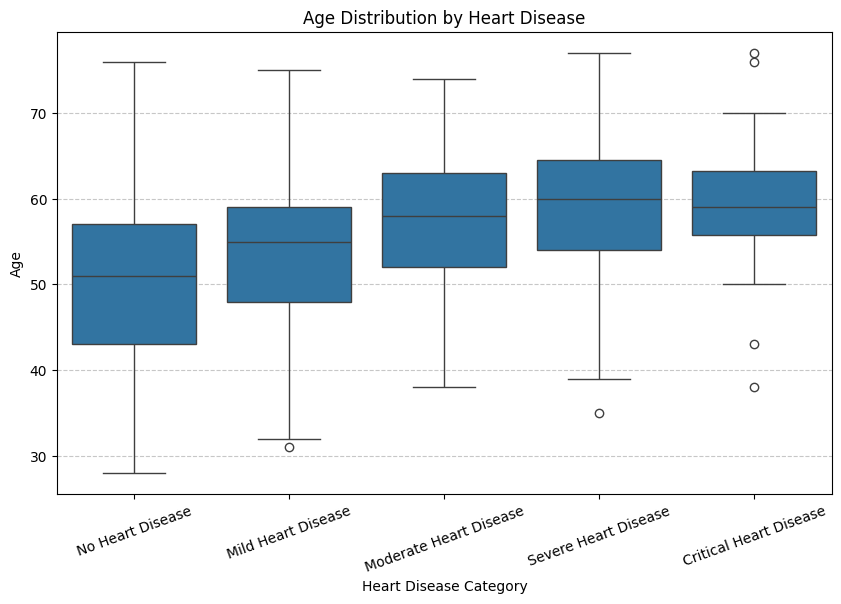

In [20]:
# Box plot of 'age' by 'heart_disease' category
category_map = {
    0: 'No Heart Disease',
    1: 'Mild Heart Disease',
    2: 'Moderate Heart Disease',
    3: 'Severe Heart Disease',
    4: 'Critical Heart Disease'
}
ordered_labels = [
    'No Heart Disease',
    'Mild Heart Disease',
    'Moderate Heart Disease',
    'Severe Heart Disease',
    'Critical Heart Disease'
]
df['heart_disease_label'] = df['heart_disease'].map(category_map)
df['heart_disease_label'] = pd.Categorical(df['heart_disease_label'], categories=ordered_labels, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_disease_label', y='age', data=df)
plt.xlabel('Heart Disease Category')
plt.ylabel('Age')
plt.xticks(rotation=20)
plt.title('Age Distribution by Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **DAY 02 - MODEL TRAINING**

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist() # one-hot code All "object" categorical columns
if 'num' in cat_cols:
    cat_cols.remove('num') #Don't encode target columns

In [22]:
x = df.drop('heart_disease', axis=1)
y = (df['heart_disease']>0).astype(int)

In [23]:
x = pd.get_dummies(x, columns=cat_cols)
print("Final Feature columns:", x.columns)

Final Feature columns: Index(['id', 'age', 'resting_blood_pressure', 'serum_cholesterol',
       'max_heart_rate', 'depression_induced_by_exercise',
       'number_of_major_vessels', 'heart_disease_label', 'sex_Female',
       'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_False', 'fasting_blood_sugar_True',
       'resting_ecg_results_lv hypertrophy', 'resting_ecg_results_normal',
       'resting_ecg_results_st-t abnormality', 'exercise_induced_angina_False',
       'exercise_induced_angina_True', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect'],
      dtype='object')


## **DAY 3 - TRAIN/TEST SPLIT, NORMALIZATION, MODELLING & MODEL EVALUATION**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# Drop the 'heart_disease_label' column before scaling as it's not numeric
x_train = x_train.drop('heart_disease_label', axis=1)
x_test = x_test.drop('heart_disease_label', axis=1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

new value = (x-mean)/standard deviation

In [28]:
from sklearn.linear_model import LogisticRegression # its about classification

In [29]:
lr_model = LogisticRegression() # giving admission to a new student
lr_model.fit(x_train, y_train) # training step

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**MODEL EVALUATION**

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
y_pred = lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7336956521739131
              precision    recall  f1-score   support

           0       0.63      0.84      0.72        75
           1       0.86      0.66      0.75       109

    accuracy                           0.73       184
   macro avg       0.74      0.75      0.73       184
weighted avg       0.76      0.73      0.74       184



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**DAY 4: RANDOM FOREST AND FEATURE IMPORTANCE**

In [33]:
from sklearn.metrics import confusion_matrix

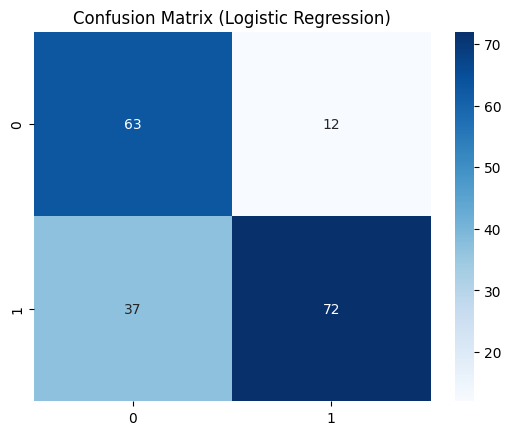

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



Feature Importance

feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

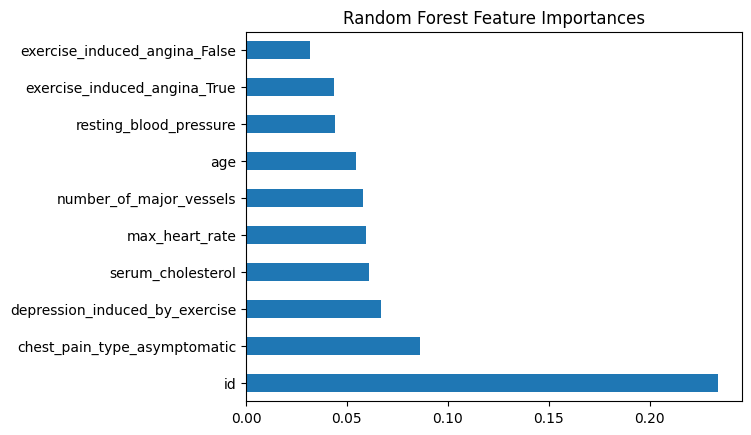

In [39]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.show()

In [40]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [41]:
sample = x.head(1)
sample.to_csv('Heart_user_template.csv', index=False)
print("User Template saved as 'Heart_user_template.csv'")

User Template saved as 'Heart_user_template.csv'


DAY 05 - USER UPLOAD & PREDICTION

In [52]:
import joblib
import pandas as pd

user_df = pd.read_csv('Heart_user_template.csv')

# Getting column list from training dataset

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

# Dropping columns which are extra in user_df than required to avoid error

numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# fill the missing numeric column, cat column & bool column
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

for col in bool_cols:
    user_df[col] = user_df[col].astype(int)


# one-hot encoding cat columns
user_df_encoded=pd.get_dummies(user_df, columns=cat_cols)

# Align column - remove 'heart_disease_label' from the column list before reindexing
aligned_columns = [col for col in x.columns if col != 'heart_disease_label']
user_df_aligned = user_df_encoded.reindex(columns=aligned_columns, fill_value=0)


# scale data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_aligned)

# Prediction
model = joblib.load('heart_rf_model.pkl')
preds= model.predict(user_df_scaled)
user_df_aligned['Heart_Disease_Prediction'] = preds

# Show result
print(user_df_aligned)

   id  age  resting_blood_pressure  serum_cholesterol  max_heart_rate  \
0   1   63                   145.0              233.0           150.0   

   depression_induced_by_exercise  number_of_major_vessels  sex_Female  \
0                             2.3                      0.0       False   

   sex_Male  dataset_Cleveland  ...  resting_ecg_results_st-t abnormality  \
0      True               True  ...                                 False   

   exercise_induced_angina_False  exercise_induced_angina_True  \
0                           True                         False   

   slope_downsloping  slope_flat  slope_upsloping  thalassemia_fixed defect  \
0               True       False            False                      True   

   thalassemia_normal  thalassemia_reversable defect  Heart_Disease_Prediction  
0               False                          False                         0  

[1 rows x 31 columns]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
